I have consistently been confused by how I can learn the dynamics of the time series, using my own time data points (in Anode and torchdiffeq repos).

In [4]:
from cosmoNODE.loaders import Anode as A

In [5]:
from cosmoNODE.anode.models import ODEBlock, ODEFunc, ODENet
from cosmoNODE.anode.training import Trainer

In [6]:
import numpy as np
from torchdiffeq import odeint_adjoint as odeint

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import DataLoader

In [8]:
a = A()
dataloader = DataLoader(a)

In [9]:
item = a[0]
lc = item[0]
obj_class = item[1]
lc

tensor([[[ 5.9750e+04, -5.4481e+02],
         [ 5.9750e+04, -8.1643e+02],
         [ 5.9750e+04, -4.7139e+02],
         [ 5.9750e+04, -3.8898e+02],
         [ 5.9752e+04, -6.8186e+02],
         [ 5.9752e+04, -1.0615e+03],
         [ 5.9752e+04, -5.2495e+02],
         [ 5.9752e+04, -3.9348e+02],
         [ 5.9752e+04, -3.5589e+02],
         [ 5.9767e+04, -5.4801e+02],
         [ 5.9767e+04, -8.1519e+02],
         [ 5.9767e+04, -4.7552e+02],
         [ 5.9767e+04, -4.0566e+02],
         [ 5.9767e+04, -4.2120e+02],
         [ 5.9770e+04, -5.5490e+02],
         [ 5.9770e+04, -8.2004e+02],
         [ 5.9770e+04, -4.7700e+02],
         [ 5.9770e+04, -4.0027e+02],
         [ 5.9770e+04, -4.1529e+02],
         [ 5.9779e+04, -6.3052e+02],
         [ 5.9779e+04, -9.2100e+02],
         [ 5.9779e+04, -5.1853e+02],
         [ 5.9779e+04, -4.2218e+02],
         [ 5.9779e+04, -4.2282e+02],
         [ 5.9782e+04, -2.8004e+02],
         [ 5.9782e+04, -4.4910e+02],
         [ 5.9782e+04, -3.1670e+02],
 

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
lc = lc.squeeze()
mjds = lc[:, 0]
fluxes = lc[:, 1]
zero = torch.cat((fluxes, mjds))
one_flux = fluxes[0].reshape(1, -1)
flxs = fluxes.reshape(1, -1)
print(one_flux.shape)

torch.Size([1, 1])


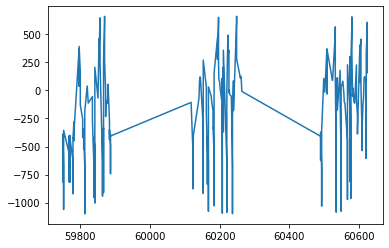

In [15]:
plt.plot(mjds.tolist(), fluxes.tolist())

In [24]:
device = torch.device('cuda:' if torch.cuda.is_available() else 'cpu')
data_dim = 1 # the data dimension should be 1 (only giving model flux)
hidden_dim = 16
output_dim = 1

func = ODEFunc(device, data_dim=data_dim, hidden_dim=hidden_dim, augment_dim=1)

In [21]:
model = ODENet(device, data_dim=data_dim, hidden_dim=hidden_dim, output_dim=output_dim, time_dependent=True)

In [25]:
block = ODEBlock(device, odefunc=func)
print(block)


ODEBlock(
  (odefunc): ODEFunc(
    (fc1): Linear(in_features=2, out_features=16, bias=True)
    (fc2): Linear(in_features=16, out_features=16, bias=True)
    (fc3): Linear(in_features=16, out_features=2, bias=True)
    (non_linearity): ReLU(inplace)
  )
)


In [34]:
fwd = block(one_flux, eval_times=mjds)
fwd
# plt.plot(mjds.tolist(), fwd.tolist())

tensor([[[-5.4481e+02,  0.0000e+00]],

        [[-5.4425e+02, -2.2169e-01]],

        [[-5.4369e+02, -4.4313e-01]],

        [[-5.4313e+02, -6.6431e-01]],

        [[-4.1922e+02, -4.6907e+01]],

        [[-4.1877e+02, -4.7071e+01]],

        [[-4.1831e+02, -4.7234e+01]],

        [[-4.1763e+02, -4.7479e+01]],

        [[-4.1695e+02, -4.7723e+01]],

        [[ 9.8728e+01, -1.6179e+02]],

        [[ 9.8865e+01, -1.6171e+02]],

        [[ 9.9002e+01, -1.6163e+02]],

        [[ 9.9208e+01, -1.6152e+02]],

        [[ 9.9413e+01, -1.6140e+02]],

        [[ 1.4184e+02, -1.2856e+02]],

        [[ 1.4193e+02, -1.2847e+02]],

        [[ 1.4203e+02, -1.2837e+02]],

        [[ 1.4217e+02, -1.2822e+02]],

        [[ 1.4226e+02, -1.2812e+02]],

        [[ 1.9609e+02, -2.9928e+01]],

        [[ 1.9612e+02, -2.9868e+01]],

        [[ 1.9616e+02, -2.9807e+01]],

        [[ 1.9619e+02, -2.9747e+01]],

        [[ 1.9624e+02, -2.9656e+01]],

        [[ 2.0856e+02, -7.6094e+00]],

        [[ 2.0860e+02, -7

In [37]:
pred = model(fluxes[0:2])

RuntimeError: invalid argument 0: Tensors must have same number of dimensions: got 2 and 1 at /pytorch/aten/src/TH/generic/THTensor.cpp:702

In [130]:
odefunc = ODEFunc(device, data_dim, hidden_dim, augment_dim,
                  time_dependent, non_linearity)

self.odeblock = ODEBlock(device, odefunc, tol=tol, adjoint=adjoint)
self.linear_layer = nn.Linear(self.odeblock.odefunc.input_dim,
                              self.output_dim)


NameError: name 'augment_dim' is not defined

In [67]:
pred


tensor([-182.8846], grad_fn=<AddBackward0>)

In [119]:
true_y0 = torch.tensor([[2., 0.]])
true_y0.shape

torch.Size([1, 2])

In [123]:
true_y0 = torch.tensor([[2., 0.]])
t = torch.linspace(0., 25., 352)
true_A = torch.tensor([[-0.1, 2.0], [-2.0, -0.1]])


class Lambda(nn.Module):

    def forward(self, t, y):
        return torch.mm(y**3, true_A)


with torch.no_grad():
    true_y = odeint(Lambda(), true_y0, t, method='dopri5')

In [155]:
batch_time = 352  # max flux seq len
data_size = 1000
batch_size = 16


def get_batch():
    s = torch.from_numpy(np.random.choice(np.arange(50, dtype=np.int64), 1, replace=False))
    batch_y0 = true_y[s]  # (M, D)
    batch_t = t[:batch_time]  # (T)
    batch_y = torch.stack([true_y[s + i] for i in range(batch_time)], dim=0)  # (T, M, D)
    return batch_y0, batch_t, batch_y

In [188]:
np.random.choice(np.arange(50, dtype=np.int64), 2, replace=False)

array([ 8, 35])

In [156]:
batch_y0, batch_t, batch_y = get_batch()

IndexError: index 352 is out of bounds for dimension 0 with size 352